# Table of Contents
 <p><div class="lev1"><a href="#Plot-surface-temperature-at-each-time-slice"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot surface temperature at each time slice</a></div><div class="lev2"><a href="#Annual-average"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Annual average</a></div>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from mpl_toolkits.basemap import Basemap
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from math import *
import glob
import string
import datetime as dt
# from datetime import date, time, datetime
from pprint import pprint
import sys,os

plt.rcParams.update({'axes.labelsize': 'x-large',
                     'axes.titlesize': 'x-large',
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'figure.titlesize': 'xx-large',
                     'figure.subplot.top': '0.87',
                     'figure.subplot.wspace': '0.5',
                     'figure.subplot.hspace': '0.3'})

In [2]:
# Add ../functions to system path
currentpath = %pwd
currentpath = str(currentpath)
##-- In a python script do the following instead:
##-- currentpath = os.path.dirname(os.path.realpath(__file__))
sys.path.insert(0,currentpath[:currentpath.rfind('/')+1]+'functions')
 

from importingData import *
from statistics import *
from extremeScaling import *
from thermodynamics import *
from thermo_funcs import *
from thermo_constants import *

# Plot surface temperature at each time slice

18500601 18500602


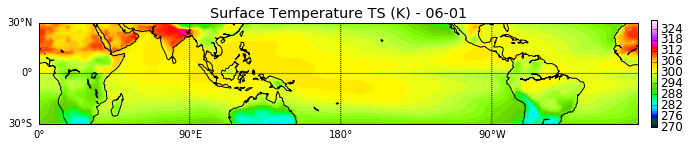

18500602 18500603


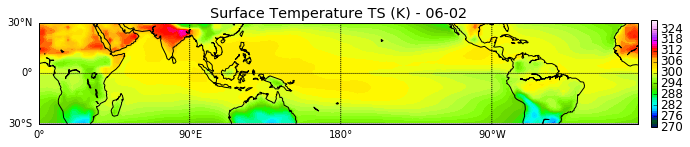

18500603 18500604


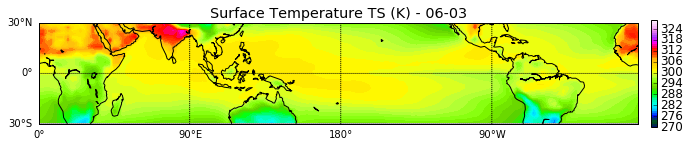

18500604 18500605


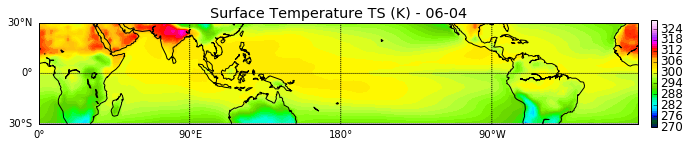

18500605 18500606


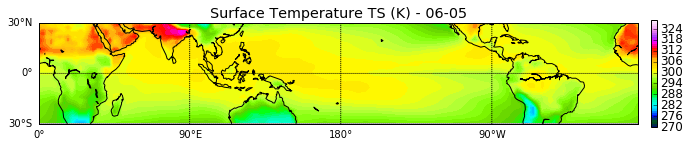

In [12]:
inputdir = '/Users/bfildier/Data/simulations/CESM111-SPCAM20/piControl/day/r1i1p1'
temp_id = 'TS'

date1 = '18500601'

for i in range(5):
    date_start = dt.datetime.strptime(date1,'%Y%m%d') + i*dt.timedelta(days=1)
    date_end = dt.datetime.strptime(date1,'%Y%m%d') + (i+1)*dt.timedelta(days=1)
    d1 = date_start.isoformat().split("T")[0].replace('-','')
    d2 = date_end.isoformat().split("T")[0].replace('-','')
    print d1, d2
    temp_file = '%s_day_CESM111-SPCAM20_piControl_r1i1p1_%s-%s.nc'%(temp_id,d1,d2)

    fh = Dataset(os.path.join(inputdir,temp_file),'r')
    temp = fh.variables[temp_id][0,:,:]

    lon1D = fh.variables['lon'][:]
    lat1D = fh.variables['lat'][:]
    lon2D, lat2D = np.meshgrid(lon1D,lat1D)

    fig = plt.figure(figsize=(12,2))
    map = Basemap(projection='cyl',lat_0=0,lon_0=180,llcrnrlon=0,llcrnrlat=-30,urcrnrlon=357,urcrnrlat=30)
    map.contourf(lon2D,lat2D,temp,cmap=plt.cm.gist_ncar,levels=range(270,330))
    map.drawparallels(range(-90, 100, 30),labels=[1,0,0,1])
    map.drawmeridians(range(0,400,90),labels=[1,0,0,1])
    map.drawcoastlines()
    plt.title('Surface Temperature %s (K) - %s'%(temp_id,date_start.isoformat().split("T")[0][5:]))
    plt.colorbar(pad=0.02,fraction=0.085)
    plt.show()

    # print temp.shape, lon1D.shape, lat1D.shape

## Annual average

current path: /Users/bfildier/Code/python/2016/SpcamExtremes/scripts
/Users/bfildier/Data/spcam/BCs/final
sstice_bc_clim_1x1_CESM1-CAM5_piControl_r1i1p1_185001-201312_annualAvg.nc
/Users/bfildier/Data/spcam/BCs/final
sstice_bc_clim_1x1_CESM1-CAM5_abrupt4xCO2_r3i1p1_185001-201312_annualAvg.nc
/Users/bfildier/Code/python/2016/SpcamExtremes/results/day
TS_yr_CESM111-SPCAM20_piControl_r1i1p1_18500601-18510530.nc
/Users/bfildier/Code/python/2016/SpcamExtremes/results/day
TS_yr_CESM111-SPCAM20_abrupt4xCO2_r1i1p1_18500601-18510530.nc


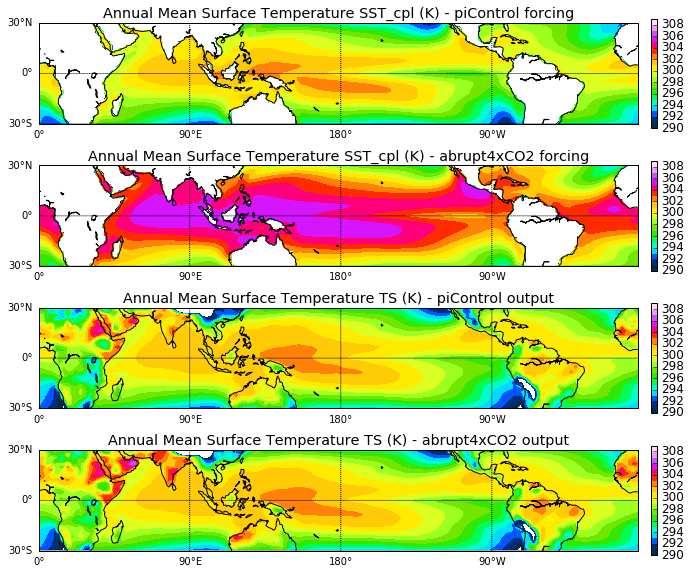

In [29]:
print "current path:", currentpath
inputdir_forcing = '/Users/bfildier/Data/spcam/BCs/final'
inputdir_sims = os.path.join(os.path.dirname(currentpath),'results/day')
temp_id = 'TS'

temp_file_forcing_PI = 'sstice_bc_clim_1x1_CESM1-CAM5_piControl_r1i1p1_185001-201312_annualAvg.nc'
temp_file_forcing_4xCO2 = 'sstice_bc_clim_1x1_CESM1-CAM5_abrupt4xCO2_r3i1p1_185001-201312_annualAvg.nc'
temp_file_PI = '%s_yr_CESM111-SPCAM20_piControl_r1i1p1_18500601-18510530.nc'%temp_id
temp_file_4xCO2 = '%s_yr_CESM111-SPCAM20_abrupt4xCO2_r1i1p1_18500601-18510530.nc'%temp_id

inputdirs = (inputdir_forcing,inputdir_forcing,inputdir_sims,inputdir_sims)
files=(temp_file_forcing_PI,temp_file_forcing_4xCO2,temp_file_PI,temp_file_4xCO2)
exp_labels = ('piControl forcing','abrupt4xCO2 forcing','piControl output','abrupt4xCO2 output')
temp_ids = ('SST_cpl','SST_cpl','TS','TS')

nfigs = 4
fig = plt.figure(figsize=(12,2.5*nfigs))

for i in range(nfigs):
    temp_file = files[i]
    inputdir = inputdirs[i]
    temp_id = temp_ids[i]
    print inputdir
    print temp_file
    fh = Dataset(os.path.join(inputdir,temp_file),'r')
    temp = fh.variables[temp_id][0,:,:]
    if i < 2:
        temp += 273.15

    lon1D = fh.variables['lon'][:]
    lat1D = fh.variables['lat'][:]
    lon2D, lat2D = np.meshgrid(lon1D,lat1D)

    ax = fig.add_subplot(nfigs,1,i+1)
    map = Basemap(projection='cyl',lat_0=0,lon_0=180,llcrnrlon=0,llcrnrlat=-30,urcrnrlon=357,urcrnrlat=30)
    map.contourf(lon2D,lat2D,temp,cmap=plt.cm.gist_ncar,levels=range(290,310))
    map.drawparallels(range(-90, 100, 30),labels=[1,0,0,1])
    map.drawmeridians(range(0,400,90),labels=[1,0,0,1])
    map.drawcoastlines()
    plt.title('Annual Mean Surface Temperature %s (K) - %s'%(temp_id,exp_labels[i]))
    plt.colorbar(pad=0.02,fraction=0.085)

plt.savefig(os.path.join(os.path.dirname(currentpath),'figures/maps/maps_TS_annual_mean_PI_4xCO2_forcing_vs_simulations.pdf'))
plt.show()

# print temp.shape, lon1D.shape, lat1D.shape

This is obviously wrong, the SST forcing was not taken into account in the earlier simulations.
Correct that and check that the SST at the first time step is now comparable.

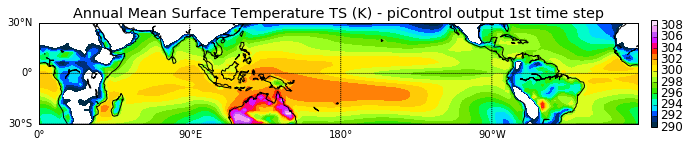

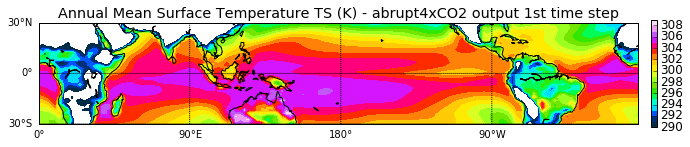

In [37]:
# inputdir = '/Users/bfildier/Code/python/2016/SpcamExtremes/inputs'
inputdir = os.path.join(os.path.dirname(currentpath),'inputs')
compsetrootname = 'bf_FSPCAMm_AMIP'
# compsetrootname = 'bf_FAMIPC5'
inputfiles = ('TS_%s_piControl.cam.h0.1850-02-01-00000.nc'%compsetrootname,
              'TS_%s_abrupt4xCO2.cam.h0.1850-02-01-00000.nc'%compsetrootname)
exp_labels = ('piControl output 1st time step','abrupt4xCO2 output 1st time step')
temp_id = 'TS'


for i in range(2):
    inputfile = inputfiles[i]
    
    fh = Dataset(os.path.join(inputdir,inputfile),'r')
    temp = fh.variables[temp_id][0,:,:]

    lon1D = fh.variables['lon'][:]
    lat1D = fh.variables['lat'][:]
    lon2D, lat2D = np.meshgrid(lon1D,lat1D)

    fig = plt.figure(figsize=(12,2))
    # ax = fig.add_subplot(nfigs,1,i+1)
    map = Basemap(projection='cyl',lat_0=0,lon_0=180,llcrnrlon=0,llcrnrlat=-30,urcrnrlon=357,urcrnrlat=30)
    map.contourf(lon2D,lat2D,temp,cmap=plt.cm.gist_ncar,levels=range(290,310))
    map.drawparallels(range(-90, 100, 30),labels=[1,0,0,1])
    map.drawmeridians(range(0,400,90),labels=[1,0,0,1])
    map.drawcoastlines()
    plt.title('Annual Mean Surface Temperature %s (K) - %s'%(temp_id,exp_labels[i]))
    plt.colorbar(pad=0.02,fraction=0.085)
    plt.show()
    
